<a href="https://colab.research.google.com/github/matvb/Sudoku-Genetico/blob/main/Tarefa_5_Algoritmo_Gen%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligência Artifical
## Tarefa 5 - Algoritmo Genético
### Mateus de Almeida Villas Boas
### DRE: 115054675



## Imports

In [30]:
import numpy as np
import random
import math

## Implementação do Algoritmo Genético


### Preenchendo a matriz real do problema (9x9)


Esta é a matriz do problema o qual é preciso achar a solução.
<br>
<br>
Como ela é uma matriz específica, com tamanho e preenchimento inicial definidos, decidi fazer a instanciação inicial dela de maneira hard-coded.
<br>
<br>
tam_tabuleiro -> Decide o tamanho dos lados da matriz
np.zeros((tam_tabuleiro,tam_tabuleiro)) -> Cria a matriz de zeros quadrada de lado tam_tabuleiro
<br>
<br>
Depois da função preenche_fixos, todos os campos "vazios" estarão preenchidos com zero, sinalizando para as próximas funções onde poderão ser alocados os números variáveis. E os já preenchidos nessa função serão fixos até o término do programa.



<div>
<img src="https://drive.google.com/thumbnail?id=1yezhTg1ErTEjZgBPnpy4E5nGTg39xt9i&authuser=0&sz=w1423-h789" width="300"/>
</div>



In [31]:
tam_tabuleiro = 9
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][3] = 7
  tab[1][0] = 1
  tab[2][3] = 4
  tab[2][4] = 3
  tab[2][6] = 2
  tab[3][8] = 6
  tab[4][3] = 5
  tab[4][5] = 9
  tab[5][6] = 4
  tab[5][7] = 1
  tab[5][8] = 8
  tab[6][4] = 8
  tab[6][5] = 1
  tab[7][3] = 2
  tab[7][7] = 5
  tab[8][1] = 4
  tab[8][6] = 3

  num_variaveis = (tab == 0).sum()

  return tab, num_variaveis

### Preenchendo uma matriz teste (4X4)




Esta é uma matriz teste consideravelmente mais fácil de se trabalhar e achar a solução do que a matriz real do problema
<br>
<br>
Toda a função de preenchimento é igual exceto pelos valores fixos e pelo valor de tam_tabuleiro


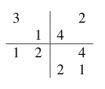

Matriz exemplo tirada do exercício 1 da lista de exercícios da semana 6


In [20]:
tam_tabuleiro = 4
tabuleiro = np.zeros((tam_tabuleiro,tam_tabuleiro))
tabuleiro_original = np.copy(tabuleiro)

def preenche_fixos(tab):
  tab[0][0] = 3
  tab[1][1] = 1
  tab[2][0] = 1
  tab[2][1] = 2
  tab[1][2] = 4
  tab[0][3] = 2
  tab[2][3] = 4
  tab[3][2] = 2
  tab[3][3] = 1

  num_variaveis = (tab == 0).sum()

  return tab, num_variaveis

### Criando tabuleiro campos iniciais com números escolhidos aleatoriamente no intervalo de números possíveis (de 1 até tam_tabuleiro)



<br>
Todos os campos considerados vazios (campos com valor 0), são preenchidos agora por um numero aleatório dentre os possíveis de acordo com o tamanho do Sudoku (entre 1 e tam_tabuleiro).
<br>
<br>
Todas as coordenadas preenchidas nesse processo são guardadas na lista "variáveis", pois serão elas as variáveis da função.
<br>
<br>
Somente os campos correspondentes as coordenadas gravadas nessa lista poderão ser mudadas no processo de Hill Climbing, fazendo com os números que foram preenchidos anteriormente permanecam fixos.

In [32]:
def preenche_iniciais(tab):
  variaveis_coord = []
  variaveis = []
  for i,row in enumerate(tab):
    for j,value in enumerate(row):
      if value == 0:
        num_rand = random.randint(1, tam_tabuleiro)
        tab[i][j] = num_rand
        variaveis_coord.append((i,j))
        variaveis.append(num_rand)

  return tab, variaveis

### Contrução da população inicial
N = Número de individuos da população
<br>
Retorno: Um conjunto de N indivíduos gerados aleatoriamente que correspondem a configurações do tabuleiro.

In [33]:
def pop_inicial(N, num_variaveis):
  pop_init = []
  
  for i in range(N):
    aux = []
    for j in range(num_variaveis):
      num_rand = random.randint(1, tam_tabuleiro)
      aux.append(num_rand)
    pop_init.append(aux)

  return pop_init



### Função objetivo

<br>
O valor retornado pela função objetivo é o número de casas erradas no tabuleiro. É uma função de minimização visto que o objetivo final é ter um tabuleiro em que a quantidade de casas erradas seja 0.
<br>
<br>
A função acha esse número percorrendo o tabuleiro e cada vez que um número se repete em uma mesma linha, coluna ou bloco é somado 1.
<br>
<br>
Se uma linha tiver três casas com o número 5 e duas casas com o número 7. A função somará 3 ao total. Porque existem dois número 5 errados e um número 7 errado nesta fileira.
<br>
<br>
Faz-se a mesma coisa para todas as fileiras, colunas e blocos e tem-se o valor total da função que é retornado.



In [34]:
def interpreta_como_tabuleiro(tab_orig, list_variaveis_orig):
  tab = np.copy(tab_orig)
  list_variaveis = list_variaveis_orig.copy()
  for i,row in enumerate(tab):
    for j,value in enumerate(row):
      if value == 0:
        tab[i][j] = list_variaveis[0]
        list_variaveis.pop(0)

  return tab

def objetivo(tab_orig, list_variaveis):
  tab = interpreta_como_tabuleiro(tab_orig, list_variaveis)

  soma_col = 0
  soma_row = 0
  soma_bloco = 0
  ja_computados =[]

  # Calcula a quantidade de número errados em cada linha ou erros detectados em linhas ou colunas.
  for i, row in enumerate(tab):
    aux_row = 0
    aux_col = 0
    aux_row2 = []
    aux_col2 = []

    for j, value in enumerate(row):
      if (value in aux_row2) and ((i,j) not in ja_computados):
        ja_computados.append((i,j))
        aux_row += 1
      aux_row2.append(value)
      if (tab[j][i] in aux_col2) and ((i,j) not in ja_computados):
        ja_computados.append((j,i))
        aux_col += 1
      aux_col2.append(tab[j][i])

    soma_row += aux_row
    soma_col += aux_col

  # Calcula a quantidade de número errados em cada linha ou erros detectados em cada bloco.
  tam_bloco = int(math.sqrt(tam_tabuleiro))
  quant_blocos = (tam_tabuleiro**2)/(tam_bloco**2)
  for bloco1 in range(tam_bloco):
    for bloco2 in range(tam_bloco):
      aux_bloco = 0
      aux_bloco2 = []
      for i in range(tam_bloco):
        for j in range(tam_bloco):
          if (tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)] in aux_bloco2) and ((i,j) not in ja_computados):
            ja_computados.append((j,i))
            aux_bloco += 1
          aux_bloco2.append(tab[i+(tam_bloco*bloco1)][j+(tam_bloco*bloco2)])

      soma_bloco += aux_bloco

  # Soma os calculos anteriores para linhas, colunas e blocos para ter o valor da função para o tabuleiro todo.
  soma_total = soma_row + soma_col + soma_bloco
  # Diminui a soma do tamanho total de casas do tabuleiro para que a função seja de maximização
  soma_total_invert = (tam_tabuleiro*tam_tabuleiro) - soma_total

  return soma_total_invert

### Função Roleta


In [35]:
def calc_roleta(valores_objetivo):
  roleta = []
  for index, i  in enumerate(valores_objetivo):
    if index == 0:
      roleta.append(i)
    else:
      roleta.append(roleta[-1]+i)

  return roleta

#### População intermediária

In [54]:
def pop_intermediaria(pop_init, elitismo=False, verbose=False):
  pop_intermed = []

  valores_objetivo = []
  for i in pop_init:
    valores_objetivo.append(objetivo(tabuleiro, i))

  roleta = calc_roleta(valores_objetivo)
  

  valores_sorteados = []
  if elitismo:
    qtd_sorteio = len(pop_init) - 1
  else:
    qtd_sorteio = len(pop_init)
  for i in range(qtd_sorteio):
    sorteio = random.uniform(0,roleta[-1])
    valores_sorteados.append(sorteio)

  if verbose:
    print("Roleta: \n", roleta, "\n")
    print("Valores Sorteados: \n", valores_sorteados, "\n")

  for index_i, valor_sorteado in enumerate(valores_sorteados):
    for index_j, j in enumerate(roleta):
      if valor_sorteado <= j:
        pop_intermed.append(pop_init[index_j])
        break

  if elitismo:
    melhor_valor = 0
    for individuo in pop_init:
      valor_tab = objetivo(tabuleiro, individuo)
      if valor_tab > melhor_valor:
        melhor_valor = valor_tab
        melhor_individuo = individuo
    pop_intermed.append(melhor_individuo)

  return pop_intermed

### CrossOver

In [37]:
def crossover(elemento1, elemento2, quant_cortes):
  tam_elemento = len(elemento1)
  novo1 = []
  novo2 = []

  cortes = []
  for i in range(quant_cortes):
    corte = random.randint(1,tam_elemento-1)
    while corte in cortes:
      corte = random.randint(1,tam_elemento-1)
    cortes.append(corte)

  cortes.sort()
  cortes.append('fim')


  #print("cortes", cortes)
  for index_i, i in enumerate(cortes):
    for j in range(tam_elemento):  
      if i != "fim":    
        if (j < i):
          if (j+1 > len(novo1)):
            if (index_i % 2) == 0:
              novo1.append(elemento1[j])
              novo2.append(elemento2[j])
            else:
              novo1.append(elemento2[j])
              novo2.append(elemento1[j])
        else:
          break

      else:
        if (j+1 > len(novo1)):
          if (index_i % 2) == 0:
            novo1.append(elemento1[j])
            novo2.append(elemento2[j])
          else:
            novo1.append(elemento2[j])
            novo2.append(elemento1[j])

  
  return novo1, novo2



### Mutação

In [38]:
def mutacao(individuo, quant_genes):
  novo_individuo = list(individuo)
  index_genes_mutados = []
  for i in range(quant_genes):
    index = random.randint(0,len(individuo)-1)
    while index in index_genes_mutados:
      index = random.randint(0,len(individuo)-1)

    index_genes_mutados.append(index)

  #print("Genes mutados:", index_genes_mutados)

  for i in index_genes_mutados:
    aux = individuo[i]
    novo_valor = random.randint(1,tam_tabuleiro)
    while novo_valor == aux:
      novo_valor = random.randint(1,tam_tabuleiro)
    
    novo_individuo[i] = novo_valor


  return novo_individuo
    


### Função Principal

In [ ]:
# Parâmetros para colorir e formatar o print dos textos
CBOLD     = '\33[1m'
CRED = '\033[91m'
CGREEN  = '\33[92m'
CBLUE   = '\33[34m'
CEND = '\033[0m'

def parametros_fixos(letra):
  if letra == 'a':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 1
    prob_mutacao = 0.03
    genes_mutados = 3
    num_geracoes = 100
  elif letra == 'b':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 3
    prob_mutacao = 0.03
    genes_mutados = 3
    num_geracoes = 100
  elif letra == 'c':
    N = 100
    prob_crossover = 0.80
    pts_crossover = 3
    prob_mutacao = 0.15
    genes_mutados = 3
    num_geracoes = 100

  return N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes

def main(N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes, elitismo=False, verbose=False):
  
  # Instancia o tabuleiro inicial apenas com os valores fixos preenchidos e determina a quantidade de variaveis possiveis
  global tabuleiro
  tabuleiro, num_variaveis = preenche_fixos(tabuleiro)

  print(CBOLD,CBLUE,"NOVA EXECUÇÃO", CEND, "\n")

  if verbose:
    print("Tabuleiro inicial: \n",tabuleiro, "\n")
    print("Número de variáveis:",num_variaveis, "\n")

  # Define o numero N de elementos que uma população inicial deve ter e a cria
  pop_init = pop_inicial(N, num_variaveis)
  print(CBOLD,CGREEN,"População inicial: \n", CEND , pop_init, "\n")

  i = 0

  pop_testada = pop_init
  for i in range(num_geracoes):

    pop_intermed = pop_intermediaria(pop_testada, elitismo, verbose)

    pop_aux = list(pop_intermed)
    pop_crossover = []
    while len(pop_aux) != 0:
      element1_cross = random.choice(pop_aux)
      pop_aux.remove(element1_cross)
      element2_cross = random.choice(pop_aux)
      pop_aux.remove(element2_cross)

      # Testa chance e faz o CrossOver se passar
      if random.random() <= prob_crossover:
        element1_novo, element2_novo = crossover(element1_cross, element2_cross, pts_crossover)
      else:
        element1_novo = element1_cross
        element2_novo = element2_cross

      pop_crossover.append(element1_novo)
      pop_crossover.append(element2_novo)
    

    

    pop_mutacao = []

    for individuo in pop_crossover:
      if random.random() <= prob_mutacao:
        #print(CBOLD,CGREEN,"FAZENDO MUTAÇÂO",CEND, "\n")
        element_novo = mutacao(individuo, genes_mutados)
      else:
        #print(CBOLD,CRED,"NÂO FAZENDO MUTAÇÂO",CEND, "\n")
        element_novo = individuo
      
      pop_mutacao.append(individuo)

    if verbose:
      print(CBOLD,CBLUE,"Geração:", i+1,CEND, "\n")
      print("População intermediária: \n", pop_intermed, "\n")
      print("População depois do CrossOver: \n", pop_crossover, "\n")
      print("População depois da Mutação: \n", pop_mutacao, "\n")

    i += 1

    pop_testada = pop_mutacao

  print(CBOLD,CRED,"População final: \n", CEND , pop_testada, "\n")

  # Printar os tabuleiros finais
  valor_media_final = 0
  melhor_valor_final = 0
  if verbose: 
    print(CBOLD,CGREEN,"Tabuleiros da Poupulação final dessa geração: \n", CEND)
  for individuo in pop_testada:
    tab = interpreta_como_tabuleiro(tabuleiro, individuo)
    valor_tab = objetivo(tabuleiro, individuo)
    if verbose:
      print(tab," Valor: ", valor_tab, "\n")

    valor_media_final += valor_tab
    if valor_tab > melhor_valor_final:
      melhor_valor_final = valor_tab

  valor_media_final  = valor_media_final/N


  valor_media_init = 0
  melhor_valor_init = 0
  for individuo in pop_init:
    valor_tab = objetivo(tabuleiro, individuo)
    valor_media_init += valor_tab
    if valor_tab > melhor_valor_init:
      melhor_valor_init = valor_tab

  valor_media_init  = valor_media_init/N
    
  return valor_media_init, melhor_valor_init, valor_media_final, melhor_valor_final

# Probabilidades e valores fixos
N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes = parametros_fixos("c")

list_med_init = []
list_melhor_init = []
list_med_final = []
list_melhor_final = []

for repeticao in range(10):
  valor_media_init, melhor_valor_init, valor_media_final, melhor_valor_final = main(N, prob_crossover, pts_crossover, prob_mutacao, genes_mutados, num_geracoes, elitismo=True)
  list_med_init.append(valor_media_init)
  list_melhor_init.append(melhor_valor_init)
  list_med_final.append(valor_media_final)
  list_melhor_final.append(melhor_valor_final)

for repeticao in range(10):
  print(CBOLD,CGREEN,"Execução:", repeticao+1, "\n", CEND)
  print(CBOLD,"Média da população inicial:", list_med_init[repeticao], "\n",CEND)
  print(CBOLD,"Melhor da população inicial:", list_melhor_init[repeticao], "\n",CEND)
  print(CBOLD,"Média da população final:", list_med_final[repeticao], "\n",CEND)
  print(CBOLD,"Melhor da população final:", list_melhor_final[repeticao], "\n",CEND)

print(CBOLD,CBLUE,"Médias finais: \n", CEND)
media_list_med_init = sum(list_med_init)/len(list_med_init)
media_list_melhor_init = sum(list_melhor_init)/len(list_melhor_init)
media_list_med_final = sum(list_med_final)/len(list_med_final)
media_list_melhor_final = sum(list_melhor_final)/len(list_melhor_final)
print(CBOLD,"Média das médias da população inicial:", media_list_med_init, "\n",CEND)
print(CBOLD,"Média dos melhores da população inicial:", media_list_melhor_init, "\n",CEND)
print(CBOLD,"Média das médias da população final::", media_list_med_final, "\n",CEND)
print(CBOLD,"Média dos melhores da população final:", media_list_melhor_final, "\n",CEND)


## Execução e Prints

In [ ]:
# Instancia o tabuleiro inicial apenas com os valores fixos preenchidos e determina a quantidade de variaveis possiveis
tabuleiro, num_variaveis = preenche_fixos(tabuleiro)
print("Tabuleiro inicial: \n",tabuleiro, "\n")
print("Número de variáveis:",num_variaveis, "\n")

# Define o numero N de elementos que uma população inicial deve ter e a cria
N = 4
pop_init = pop_inicial(N, num_variaveis)
print("População inicial: \n", pop_init, "\n")

pop_intermed = pop_intermediaria(pop_init)
print("População intermediária: \n", pop_intermed, "\n")


crossover([3, 4, 1, 2, 1, 4, 1], [4, 4, 4, 3, 3, 1, 4],3)


mutacao([3, 4, 1, 2, 1, 4, 1],2)

print("foi")
teste = interpreta_como_tabuleiro(tabuleiro,[2, 3, 8, 9, 7, 5, 6, 4, 9, 3, 5, 8, 2, 6, 7, 3, 1, 7, 5, 6, 5, 9, 1, 1, 5, 6, 9, 4, 2, 3, 7, 1, 4, 2, 6, 8, 3, 9, 6, 3, 4, 7, 2, 8, 8, 2, 6, 4, 2, 5, 1, 2, 9, 5, 4, 8, 9, 6, 1, 6, 4, 2, 3, 1])
print(teste)

## Relatório

### Verbose = False:
Matriz 9X9, sem elitismo, letra 'a' - 38 segundos

### Verbose = True:
Matriz 9X9, sem elitismo, letra 'a' - 52 segundos

### Error
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)







### Representação do Tabuleiro Sudoku

Diferentemente do trabalho de implementação do Algoritmo Hill-Climbing, que usava a representação matricial para o tabuleiro, este algoritmo usa a representação em forma de uma única lista.
<br>
<br>
Primeiro são definidos os valores fixos do tabuleiro, os valores dados inicialmente e que não podem ser mudados no decorrer da execução. Depois uma matriz é formada com os valores fixos e os demais valores vazios representados como "0". Guarda-se a quantidade valores vazios que esse tabuleiro inicial possui. Será a quantidade de variáveis do problema.
<br>
No inicio da função principal, quando se precisa criar a população inicial, simplesmente cria-se para cada individuo da população uma lista, de tamanho da quantidade de variáveis, e preenche-as aleatoriamente.
<br>
<br>
Durante todo o algoritmo um individo da população é sempre representado por uma lista com o tamanho de variáveis que o tabuleiro do problema possui. O único momento em que a lista-individuo é interpretada como matriz de fato é na função objetivo. Essa conversão é feita pela função interpreta_como_tabuleiro(), que recebe o tabuleiro original só preenchido com os valores fixos e um individuo na representação como lista, e devolve uma matriz com todos os valores fixos e os valores variáveis inseridos ordenadamente em cada espaço vazio, representando finalmente o tabuleiro Sudoku.

Exemplo de individuo de uma população para um problema de matriz 9X9:
<br>
<b>
[2, 3, 8, 9, 7, 5, 6, 4, 9, 3, 5, 8, 2, 6, 7, 3, 1, 7, 5, 6, 5, 9, 1, 1, 5, 6, 9, 4, 2, 3, 7, 1, 4, 2, 6, 8, 3, 9, 6, 3, 4, 7, 2, 8, 8, 2, 6, 4, 2, 5, 1, 2, 9, 5, 4, 8, 9, 6, 1, 6, 4, 2, 3, 1]
</b>

Tabuleiro contruido a partir deste individuo e dos valores fixos dados pelo problema:
<br>
<b>
[[2. 3. 8. 7. 9. 7. 5. 6. 4.]<br>
 [1. 9. 3. 5. 8. 2. 6. 7. 3.]<br>
 [1. 7. 5. 4. 3. 6. 2. 5. 9.]<br>
 [1. 1. 5. 6. 9. 4. 2. 3. 6.]<br>
 [7. 1. 4. 5. 2. 9. 6. 8. 3.]<br>
 [9. 6. 3. 4. 7. 2. 4. 1. 8.]<br>
 [8. 8. 2. 6. 8. 1. 4. 2. 5.]<br>
 [1. 2. 9. 2. 5. 4. 8. 5. 9.]<br>
 [6. 4. 1. 6. 4. 2. 3. 3. 1.]]
</b>


### Função Objetivo

A função objetivo calcula a quantidade de números errados que existe no tabuleiro e depois diminui esse número da quantidade total de casas que existe no tabuleiro.
<br>
<br>
#### Como é feito:
Primeiramente a lista de número que representa o individuo é dada como entrada na função intepreta_como_tabuleiro() que, como o nome sugere, transforma a representação de lista em uma representação completa em forma de matriz incluindo os números fixos.
<br>
<br>
Depois, através de loops, passa-se por todas as linhas, colunas e blocos e é somado +1 para cada vez que um mesmo algarismo repetir.
<br>
<br>
Não é desejado que o mesmo número seja contado como erro mais de uma vez em linhas, colunas e blocos. Para isso, cada vez que é detectado um valor errado, além de somar +1, também é salva a coordenada em que o erro foi achado em uma lista. Nas próximas checagens de linhas, coluna ou blocos, antes de somar +1 ao se detectar um erro, primeiro verifica-se se a coordenada está contifa na lista de coordenadas em que já foram detectados erros anteriormente. Somente se a coordenada não estiver na lista que se incremetará o somatório e em seguida se acrescentará a coordenada na lista.
<br>
<br>
Com essa metodologia chegamos a um resultado final que representa os números errados no tabuleiro, que pode varias de 0 até o número de varíaves. 
<br>
<br>
Mas é desejável que  afunção seja de maximização, para facilitar a implementação da função roleta(). Para isso então, pego o valor calculado do total de números errados e decremento do número total de espaços do tabuleiro. Com o máximo global sendo 81 no caso do tabuleiro 9X9 testado.



### Resultados

Aqui é mostrado o resultado obtido executando a função main() 10 vezes.
<br>
É apresentado a média da população inicial, a média da população final, o valor da função objetivo do melhor indivíduo da população inicial e final de cada uma das 10 execuções.
<br>
<b>
Não estava definido no enunciado, então eu defini a quantidade de genes a ser mutados como 3, quando um individuo for escolhido para sofrer mutação de acordo com a porcentagem de chance.
</b>

#### Sem elitismo, letra 'a'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 1, probabilidade de mutação = 3%, número de gerações =100

  Execução: 1 
 
 Média da população inicial: 29.51 
 
 Melhor da população inicial: 41 
 
 Média da população final: 45.1 
 
 Melhor da população final: 48 
 
  Execução: 2 
 
 Média da população inicial: 29.46 
 
 Melhor da população inicial: 40 
 
 Média da população final: 44.05 
 
 Melhor da população final: 49 
 
  Execução: 3 
 
 Média da população inicial: 29.72 
 
 Melhor da população inicial: 42 
 
 Média da população final: 44.1 
 
 Melhor da população final: 46 
 
  Execução: 4 
 
 Média da população inicial: 29.76 
 
 Melhor da população inicial: 40 
 
 Média da população final: 43.96 
 
 Melhor da população final: 48 
 
  Execução: 5 
 
 Média da população inicial: 30.07 
 
 Melhor da população inicial: 37 
 
 Média da população final: 44.51 
 
 Melhor da população final: 49 
 
  Execução: 6 
 
 Média da população inicial: 30.31 
 
 Melhor da população inicial: 39 
 
 Média da população final: 42.24 
 
 Melhor da população final: 46 
 
  Execução: 7 
 
 Média da população inicial: 29.56 
 
 Melhor da população inicial: 39 
 
 Média da população final: 39.67 
 
 Melhor da população final: 45 
 
  Execução: 8 
 
 Média da população inicial: 30.05 
 
 Melhor da população inicial: 43 
 
 Média da população final: 44.03 
 
 Melhor da população final: 47 
 
  Execução: 9 
 
 Média da população inicial: 30.1 
 
 Melhor da população inicial: 41 
 
 Média da população final: 41.04 
 
 Melhor da população final: 46 
 
  Execução: 10 
 
 Média da população inicial: 30.05 
 
 Melhor da população inicial: 41 
 
 Média da população final: 43.9 
 
 Melhor da população final: 50 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.859 
 
 Média dos melhores da população inicial: 40.3 
 
 Média das médias da população final:: 43.26 
 
 Média dos melhores da população final: 47.4 

#### Com elitismo, letra 'a'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 1, probabilidade de mutação = 3%, número de gerações =100

 Execução: 1 
 
 Média da população inicial: 29.61 
 
 Melhor da população inicial: 37 
 
 Média da população final: 46.37 
 
 Melhor da população final: 51 
 
  Execução: 2 
 
 Média da população inicial: 30.23 
 
 Melhor da população inicial: 40 
 
 Média da população final: 51.57 
 
 Melhor da população final: 55 
 
  Execução: 3 
 
 Média da população inicial: 29.07 
 
 Melhor da população inicial: 39 
 
 Média da população final: 50.87 
 
 Melhor da população final: 54 
 
  Execução: 4 
 
 Média da população inicial: 29.64 
 
 Melhor da população inicial: 37 
 
 Média da população final: 48.1 
 
 Melhor da população final: 55 
 
  Execução: 5 
 
 Média da população inicial: 29.45 
 
 Melhor da população inicial: 41 
 
 Média da população final: 43.59 
 
 Melhor da população final: 49 
 
  Execução: 6 
 
 Média da população inicial: 29.91 
 
 Melhor da população inicial: 40 
 
 Média da população final: 46.42 
 
 Melhor da população final: 51 
 
  Execução: 7 
 
 Média da população inicial: 30.02 
 
 Melhor da população inicial: 42 
 
 Média da população final: 45.53 
 
 Melhor da população final: 53 
 
  Execução: 8 
 
 Média da população inicial: 29.48 
 
 Melhor da população inicial: 39 
 
 Média da população final: 47.28 
 
 Melhor da população final: 52 
 
  Execução: 9 
 
 Média da população inicial: 30.64 
 
 Melhor da população inicial: 45 
 
 Média da população final: 51.95 
 
 Melhor da população final: 54 
 
  Execução: 10 
 
 Média da população inicial: 29.09 
 
 Melhor da população inicial: 37 
 
 Média da população final: 48.59 
 
 Melhor da população final: 52 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.714 
 
 Média dos melhores da população inicial: 39.7 
 
 Média das médias da população final:: 48.027 
 
 Média dos melhores da população final: 52.6 

#### Sem elitismo, letra 'b'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 3, probabilidade de mutação = 3%, número de gerações =100 

  Execução: 1 
 
 Média da população inicial: 29.41 
 
 Melhor da população inicial: 38 
 
 Média da população final: 41.03 
 
 Melhor da população final: 47 
 
  Execução: 2 
 
 Média da população inicial: 29.16 
 
 Melhor da população inicial: 39 
 
 Média da população final: 41.65 
 
 Melhor da população final: 47 
 
  Execução: 3 
 
 Média da população inicial: 29.51 
 
 Melhor da população inicial: 37 
 
 Média da população final: 45.75 
 
 Melhor da população final: 51 
 
  Execução: 4 
 
 Média da população inicial: 29.78 
 
 Melhor da população inicial: 40 
 
 Média da população final: 43.93 
 
 Melhor da população final: 50 
 
  Execução: 5 
 
 Média da população inicial: 29.38 
 
 Melhor da população inicial: 39 
 
 Média da população final: 44.79 
 
 Melhor da população final: 49 
 
  Execução: 6 
 
 Média da população inicial: 29.81 
 
 Melhor da população inicial: 44 
 
 Média da população final: 44.59 
 
 Melhor da população final: 50 
 
  Execução: 7 
 
 Média da população inicial: 29.55 
 
 Melhor da população inicial: 43 
 
 Média da população final: 37.73 
 
 Melhor da população final: 45 
 
  Execução: 8 
 
 Média da população inicial: 30.13 
 
 Melhor da população inicial: 39 
 
 Média da população final: 39.72 
 
 Melhor da população final: 45 
 
  Execução: 9 
 
 Média da população inicial: 29.7 
 
 Melhor da população inicial: 36 
 
 Média da população final: 43.59 
 
 Melhor da população final: 49 
 
  Execução: 10 
 
 Média da população inicial: 30.09 
 
 Melhor da população inicial: 38 
 
 Média da população final: 42.42 
 
 Melhor da população final: 49 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.651999999999997 
 
 Média dos melhores da população inicial: 39.3 
 
 Média das médias da população final:: 42.52000000000001 
 
 Média dos melhores da população final: 48.2

#### Com elitismo, letra 'b'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 3, probabilidade de mutação = 3%, número de gerações =100 

  Execução: 1 
 
 Média da população inicial: 29.6 
 
 Melhor da população inicial: 38 
 
 Média da população final: 44.44 
 
 Melhor da população final: 50 
 
  Execução: 2 
 
 Média da população inicial: 30.02 
 
 Melhor da população inicial: 38 
 
 Média da população final: 47.57 
 
 Melhor da população final: 52 
 
  Execução: 3 
 
 Média da população inicial: 29.82 
 
 Melhor da população inicial: 38 
 
 Média da população final: 47.9 
 
 Melhor da população final: 53 
 
  Execução: 4 
 
 Média da população inicial: 30.12 
 
 Melhor da população inicial: 38 
 
 Média da população final: 46.35 
 
 Melhor da população final: 54 
 
  Execução: 5 
 
 Média da população inicial: 29.76 
 
 Melhor da população inicial: 44 
 
 Média da população final: 47.53 
 
 Melhor da população final: 54 
 
  Execução: 6 
 
 Média da população inicial: 29.38 
 
 Melhor da população inicial: 39 
 
 Média da população final: 45.65 
 
 Melhor da população final: 51 
 
  Execução: 7 
 
 Média da população inicial: 30.13 
 
 Melhor da população inicial: 40 
 
 Média da população final: 47.63 
 
 Melhor da população final: 53 
 
  Execução: 8 
 
 Média da população inicial: 29.79 
 
 Melhor da população inicial: 40 
 
 Média da população final: 47.7 
 
 Melhor da população final: 53 
 
  Execução: 9 
 
 Média da população inicial: 29.39 
 
 Melhor da população inicial: 40 
 
 Média da população final: 46.29 
 
 Melhor da população final: 52 
 
  Execução: 10 
 
 Média da população inicial: 30.12 
 
 Melhor da população inicial: 39 
 
 Média da população final: 49.53 
 
 Melhor da população final: 55 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.813 
 
 Média dos melhores da população inicial: 39.4 
 
 Média das médias da população final:: 47.059000000000005 
 
 Média dos melhores da população final: 52.7 

#### Sem elitismo, letra 'c'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 3, probabilidade de mutação = 15%, número de gerações =100

  Execução: 1 
 
 Média da população inicial: 29.72 
 
 Melhor da população inicial: 39 
 
 Média da população final: 45.57 
 
 Melhor da população final: 51 
 
  Execução: 2 
 
 Média da população inicial: 29.54 
 
 Melhor da população inicial: 39 
 
 Média da população final: 40.54 
 
 Melhor da população final: 47 
 
  Execução: 3 
 
 Média da população inicial: 30.25 
 
 Melhor da população inicial: 39 
 
 Média da população final: 43.67 
 
 Melhor da população final: 48 
 
  Execução: 4 
 
 Média da população inicial: 30.08 
 
 Melhor da população inicial: 37 
 
 Média da população final: 46.8 
 
 Melhor da população final: 52 
 
  Execução: 5 
 
 Média da população inicial: 29.03 
 
 Melhor da população inicial: 37 
 
 Média da população final: 44.2 
 
 Melhor da população final: 48 
 
  Execução: 6 
 
 Média da população inicial: 29.34 
 
 Melhor da população inicial: 39 
 
 Média da população final: 44.21 
 
 Melhor da população final: 50 
 
  Execução: 7 
 
 Média da população inicial: 29.82 
 
 Melhor da população inicial: 39 
 
 Média da população final: 43.0 
 
 Melhor da população final: 51 
 
  Execução: 8 
 
 Média da população inicial: 29.75 
 
 Melhor da população inicial: 38 
 
 Média da população final: 42.32 
 
 Melhor da população final: 46 
 
  Execução: 9 
 
 Média da população inicial: 29.61 
 
 Melhor da população inicial: 39 
 
 Média da população final: 43.41 
 
 Melhor da população final: 48 
 
  Execução: 10 
 
 Média da população inicial: 30.04 
 
 Melhor da população inicial: 40 
 
 Média da população final: 44.61 
 
 Melhor da população final: 51 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.718 
 
 Média dos melhores da população inicial: 38.6 
 
 Média das médias da população final:: 43.83299999999999 
 
 Média dos melhores da população final: 49.2 

#### Com elitismo, letra 'c'
tamanho da população = 100, probabilidade de crossover = 80%, número de pontos de crossover = 3, probabilidade de mutação = 15%, número de gerações =100

  Execução: 1 
 
 Média da população inicial: 29.31 
 
 Melhor da população inicial: 38 
 
 Média da população final: 51.76 
 
 Melhor da população final: 56 
 
  Execução: 2 
 
 Média da população inicial: 29.81 
 
 Melhor da população inicial: 42 
 
 Média da população final: 50.43 
 
 Melhor da população final: 56 
 
  Execução: 3 
 
 Média da população inicial: 29.71 
 
 Melhor da população inicial: 38 
 
 Média da população final: 47.44 
 
 Melhor da população final: 52 
 
  Execução: 4 
 
 Média da população inicial: 29.62 
 
 Melhor da população inicial: 39 
 
 Média da população final: 50.77 
 
 Melhor da população final: 56 
 
  Execução: 5 
 
 Média da população inicial: 29.5 
 
 Melhor da população inicial: 38 
 
 Média da população final: 49.88 
 
 Melhor da população final: 56 
 
  Execução: 6 
 
 Média da população inicial: 29.61 
 
 Melhor da população inicial: 40 
 
 Média da população final: 48.75 
 
 Melhor da população final: 55 
 
  Execução: 7 
 
 Média da população inicial: 29.1 
 
 Melhor da população inicial: 37 
 
 Média da população final: 49.21 
 
 Melhor da população final: 55 
 
  Execução: 8 
 
 Média da população inicial: 30.25 
 
 Melhor da população inicial: 38 
 
 Média da população final: 47.56 
 
 Melhor da população final: 53 
 
  Execução: 9 
 
 Média da população inicial: 29.62 
 
 Melhor da população inicial: 38 
 
 Média da população final: 43.92 
 
 Melhor da população final: 51 
 
  Execução: 10 
 
 Média da população inicial: 29.52 
 
 Melhor da população inicial: 38 
 
 Média da população final: 49.67 
 
 Melhor da população final: 54 
 
  Médias finais: 
 
 Média das médias da população inicial: 29.604999999999997 
 
 Média dos melhores da população inicial: 38.6 
 
 Média das médias da população final:: 48.939 
 
 Média dos melhores da população final: 54.4 